# Task 1 - Natural Visibility Graph & Horizontal Visibility Graph



In [1]:
# Installing necessary libraries

!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.2 MB/s 


In [2]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 6.7 MB/s 


In [3]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.8 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=83747e539a23d5b67a73b78b59de7197e30e8a8acf05675f29fb100343086213
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi


In [5]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
from ts2vg import NaturalVG, HorizontalVG
import os
from matplotlib import pyplot as plt 
import seaborn as sns 
from IPython.core.pylabtools import figsize
from pandas.core.groupby.grouper import final

In [4]:
# Mounting google drive for accessing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Creating a function for computing Natural Visibility Graph
lst = []
def natural_vg(sub, activity, data, body_part):
  # Applying Natural Visibility Graph
  for axis in ['x', 'y', 'z']:
    nvg = NaturalVG()
    nvg.build(data['attr_{}'.format(axis)][1000:2024])
    nvg_graph = nvg.as_igraph()
    
    # Computing average degree, network diameter, and average path length for natural visibility graph
    nvg_average_degree = np.mean(nvg_graph.degree())
    nvg_network_diameter = nvg_graph.diameter()
    nvg_average_path_length = nvg_graph.average_path_length()

    lst.extend([['NVG', sub, axis, nvg_average_degree, nvg_network_diameter, nvg_average_path_length, activity, body_part]]) 

# Creating a function for computing Horizontal Visibility Graph
def horizontal_vg(sub, activity, data, body_part):

  # Applying Horizontal Visibility Graph 
  for axis in ['x', 'y', 'z']:
    hvg = HorizontalVG()
    hvg.build(data['attr_{}'.format(axis)][1000:2024])
    hvg_graph = hvg.as_igraph()

    # Computing average degree, network diameter, and average path length for natural visibility graph
    hvg_average_degree = np.mean(hvg_graph.degree())
    hvg_network_diameter = hvg_graph.diameter()
    hvg_average_path_length = hvg_graph.average_path_length()

    lst.extend([['HVG', sub, axis, hvg_average_degree, hvg_network_diameter, hvg_average_path_length, activity, body_part]]) 

In [7]:
# Getting the names of all csv files in the directory
dir = "/content/drive/MyDrive/FDA /FDA_Project2/acc_subject1"
file_lst = []

for file in os.listdir(dir):
  if file.endswith(".csv"): 
    file_lst.append(file)

In [8]:
# Checking if the file is in the directory and applying the functinons if it is available.     

lst = []

sub = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
activity = ['running', 'walking', 'climbingup', 'climbingdown']
body_part = ['chest', 'head']

for i in sub: 
  for j in activity: 
    for k in body_part:
      
      csv_file = "acc_" + j + "_" + k + i + ".csv"

      if csv_file in file_lst: 
        
        # Reading the file from the directory
        data = pd.read_csv(os.path.join(dir, csv_file))
        
        # Applying Natural Visibility Algorithm 
        natural_vg(i, j, data, k)

        # Applying Horizontal Visibility Algorithm
        horizontal_vg(i, j, data, k)
      
      else: 
        print('Sorry! The data you are looking for is not available.')

In [9]:
# Converting list to a dataframe
df = pd.DataFrame(lst, columns = ['Method', 'Subject', 'Accelerometer Axis', 'Average Degree', 'Network Diameter', 'Average Path Length', 'Activity', 'Body Part'])

In [10]:
# Creating separate tables for head and chest data
df_head = df[df['Body Part'] == 'head']
df_chest = df[df['Body Part'] == 'chest']

# Filtering out data for running & walking, climbing up & climbing down
df1 = df_head[df_head['Activity'].isin(['running', 'walking'])]
df2 = df_chest[df_chest['Activity'].isin(['running', 'walking'])]
df3 = df_head[df_head['Activity'].isin(['climbingup', 'climbingdown'])]
df4 = df_chest[df_chest['Activity'].isin(['climbingup', 'climbingdown'])]

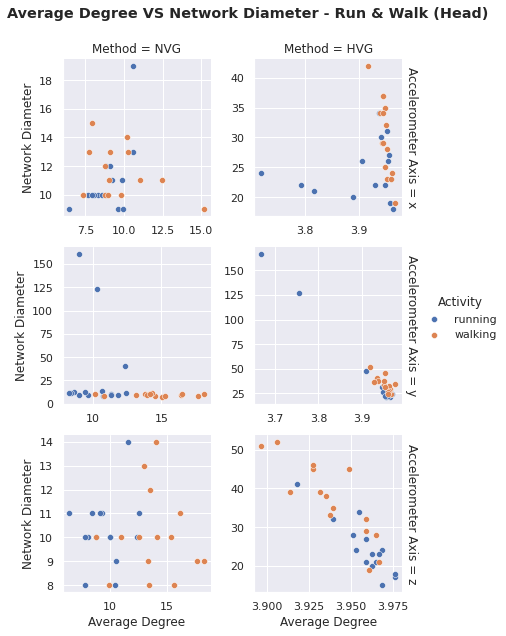

In [11]:
# Running VS Walking - Head

# Setting figure size
sns.set( rc = {'figure.figsize' : (25, 25), 
               'axes.labelsize' : 12 })

# Creating a subplot using FacetGrid
sp1 = sns.FacetGrid(df1, col=('Method'), row='Accelerometer Axis', hue='Activity', margin_titles=True, sharex=False, sharey=False)
sp1.map(sns.scatterplot, 'Average Degree', 'Network Diameter')
sp1.fig.suptitle('Average Degree VS Network Diameter - Run & Walk (Head)', fontweight = 'bold')
sp1.fig.subplots_adjust(top = 0.90)
sp1.add_legend()

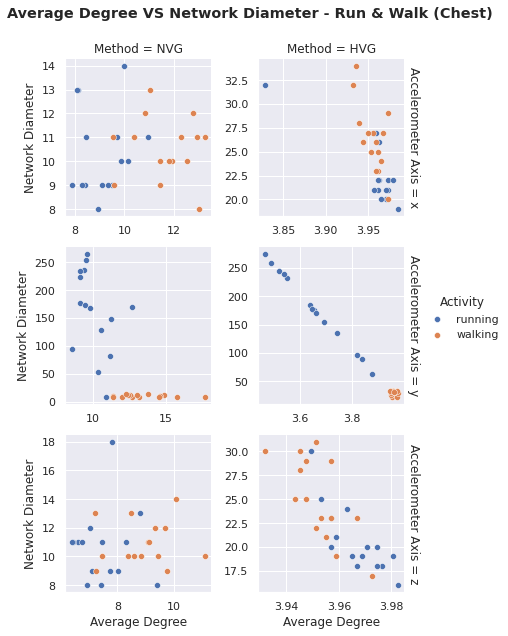

In [12]:
# Running VS Walking - Chest

# Creating a subplot using FacetGrid
sp2 = sns.FacetGrid(df2, col=('Method'), row='Accelerometer Axis', hue='Activity', margin_titles=True, sharex=False, sharey=False)
sp2.map(sns.scatterplot, 'Average Degree', 'Network Diameter')
sp2.fig.suptitle('Average Degree VS Network Diameter - Run & Walk (Chest)', fontweight = 'bold')
sp2.fig.subplots_adjust(top = 0.90)
sp2.add_legend()

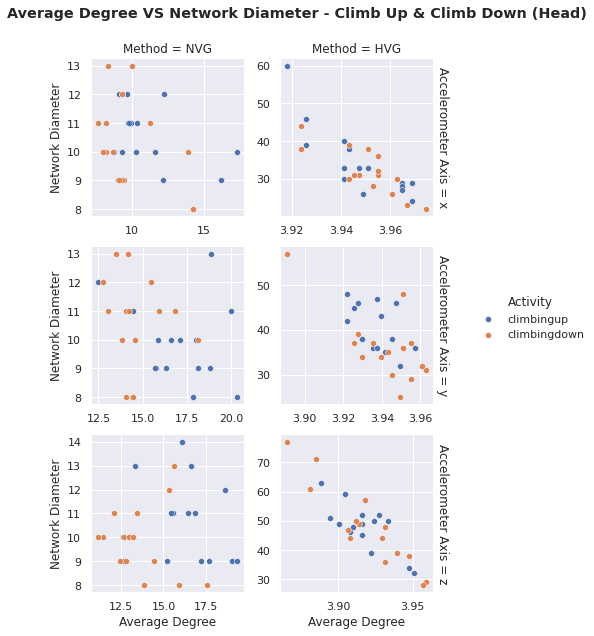

In [13]:
# Climbing Up VS Climbing Down - Head

# Creating a subplot using FacetGrid
sp3 = sns.FacetGrid(df3, col=('Method'), row='Accelerometer Axis', hue='Activity', margin_titles=True, sharex=False, sharey=False)
sp3.map(sns.scatterplot, 'Average Degree', 'Network Diameter')
sp3.fig.suptitle('Average Degree VS Network Diameter - Climb Up & Climb Down (Head)', fontweight = 'bold')
sp3.fig.subplots_adjust(top = 0.90)
sp3.add_legend()

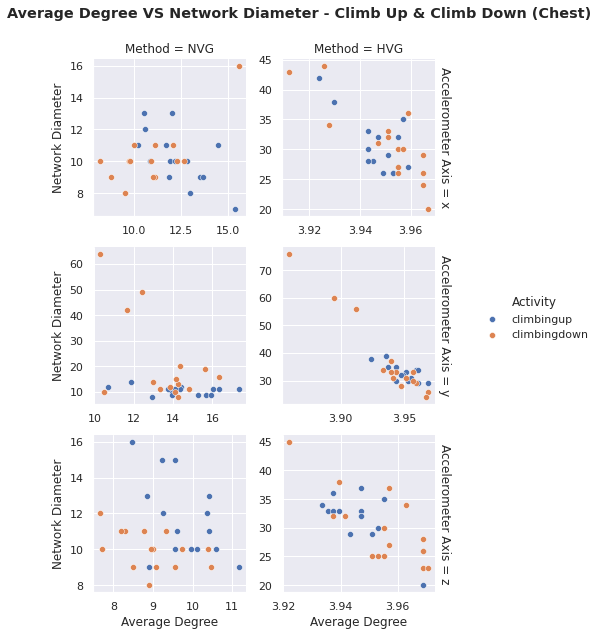

In [14]:
# Climbing Up VS Climbing Down - Chest

# Creating a subplot using FacetGrid
sp4 = sns.FacetGrid(df4, col=('Method'), row='Accelerometer Axis', hue='Activity', margin_titles=True, sharex=False, sharey=False)
sp4.map(sns.scatterplot, 'Average Degree', 'Network Diameter')
sp4.fig.suptitle('Average Degree VS Network Diameter - Climb Up & Climb Down (Chest)', fontweight = 'bold')
sp4.fig.subplots_adjust(top = 0.90)
sp4.add_legend()

# Task 2 - Permutation Entropy & Complexity 

In [ ]:
# Reading chest data for all activities into dataframes

climbingdown_chest_sub1 = pd.read_csv('acc_climbingdown_chest1.csv')
climbingup_chest_sub1 = pd.read_csv('acc_climbingup_chest1.csv')
running_chest_sub1 = pd.read_csv('acc_running_chest1.csv')
walking_chest_sub1 = pd.read_csv('acc_walking_chest1.csv')

climbingdown_chest_sub2 = pd.read_csv('acc_climbingdown_chest2.csv')
climbingup_chest_sub2 = pd.read_csv('acc_climbingup_chest2.csv')
running_chest_sub2 = pd.read_csv('acc_running_chest2.csv')
walking_chest_sub2 = pd.read_csv('acc_walking_chest2.csv')

climbingdown_chest_sub3 = pd.read_csv('acc_climbingdown_chest3.csv')
climbingup_chest_sub3 = pd.read_csv('acc_climbingup_chest3.csv')
running_chest_sub3 = pd.read_csv('acc_running_chest3.csv')
walking_chest_sub3 = pd.read_csv('acc_walking_chest3.csv')

climbingdown_chest_sub4 = pd.read_csv('acc_climbingdown_chest4.csv')
climbingup_chest_sub4 = pd.read_csv('acc_climbingup_chest4.csv')
running_chest_sub4 = pd.read_csv('acc_running_chest4.csv')
walking_chest_sub4 = pd.read_csv('acc_walking_chest4.csv')

climbingdown_chest_sub5 = pd.read_csv('acc_climbingdown_chest5.csv')
climbingup_chest_sub5 = pd.read_csv('acc_climbingup_chest5.csv')
running_chest_sub5 = pd.read_csv('acc_running_chest5.csv')
walking_chest_sub5 = pd.read_csv('acc_walking_chest5.csv')

climbingdown_chest_sub6 = pd.read_csv('acc_climbingdown_chest6.csv')
climbingup_chest_sub6 = pd.read_csv('acc_climbingup_chest6.csv')
running_chest_sub6 = pd.read_csv('acc_running_chest6.csv')
walking_chest_sub6 = pd.read_csv('acc_walking_chest6.csv')

climbingdown_chest_sub7 = pd.read_csv('acc_climbingdown_chest7.csv')
climbingup_chest_sub7 = pd.read_csv('acc_climbingup_chest7.csv')
running_chest_sub7 = pd.read_csv('acc_running_chest7.csv')
walking_chest_sub7 = pd.read_csv('acc_walking_chest7.csv')

climbingdown_chest_sub8 = pd.read_csv('acc_climbingdown_chest8.csv')
climbingup_chest_sub8 = pd.read_csv('acc_climbingup_chest8.csv')
running_chest_sub8 = pd.read_csv('acc_running_chest8.csv')
walking_chest_sub8 = pd.read_csv('acc_walking_chest8.csv')

climbingdown_chest_sub9 = pd.read_csv('acc_climbingdown_chest9.csv')
climbingup_chest_sub9 = pd.read_csv('acc_climbingup_chest9.csv')
running_chest_sub9 = pd.read_csv('acc_running_chest9.csv')
walking_chest_sub9 = pd.read_csv('acc_walking_chest9.csv')

climbingdown_chest_sub10 = pd.read_csv('acc_climbingdown_chest10.csv')
climbingup_chest_sub10 = pd.read_csv('acc_climbingup_chest10.csv')
running_chest_sub10 = pd.read_csv('acc_running_chest10.csv')
walking_chest_sub10 = pd.read_csv('acc_walking_chest10.csv')

climbingdown_chest_sub11 = pd.read_csv('acc_climbingdown_chest11.csv')
climbingup_chest_sub11 = pd.read_csv('acc_climbingup_chest11.csv')
running_chest_sub11 = pd.read_csv('acc_running_chest11.csv')
walking_chest_sub11 = pd.read_csv('acc_walking_chest11.csv')

climbingdown_chest_sub12 = pd.read_csv('acc_climbingdown_chest12.csv')
climbingup_chest_sub12 = pd.read_csv('acc_climbingup_chest12.csv')
running_chest_sub12 = pd.read_csv('acc_running_chest12.csv')
walking_chest_sub12 = pd.read_csv('acc_walking_chest12.csv')

climbingdown_chest_sub13 = pd.read_csv('acc_climbingdown_chest13.csv')
climbingup_chest_sub13 = pd.read_csv('acc_climbingup_chest13.csv')
running_chest_sub13 = pd.read_csv('acc_running_chest13.csv')
walking_chest_sub13 = pd.read_csv('acc_walking_chest13.csv')

climbingdown_chest_sub14 = pd.read_csv('acc_climbingdown_chest14.csv')
climbingup_chest_sub14 = pd.read_csv('acc_climbingup_chest14.csv')
running_chest_sub14 = pd.read_csv('acc_running_chest14.csv')
walking_chest_sub14 = pd.read_csv('acc_walking_chest14.csv')

climbingdown_chest_sub15 = pd.read_csv('acc_climbingdown_chest15.csv')
climbingup_chest_sub15 = pd.read_csv('acc_climbingup_chest15.csv')
running_chest_sub15 = pd.read_csv('acc_running_chest15.csv')
walking_chest_sub15 = pd.read_csv('acc_walking_chest15.csv')


In [ ]:
# Reading head data for all activities into dataframes

climbingdown_head_sub1 = pd.read_csv('acc_climbingdown_head1.csv')
climbingup_head_sub1 = pd.read_csv('acc_climbingup_head1.csv')
running_head_sub1 = pd.read_csv('acc_running_head1.csv')
walking_head_sub1 = pd.read_csv('acc_walking_head1.csv')

climbingdown_head_sub2 = pd.read_csv('acc_climbingdown_head2.csv')
climbingup_head_sub2 = pd.read_csv('acc_climbingup_head2.csv')
running_head_sub2 = pd.read_csv('acc_running_head2.csv')
walking_head_sub2 = pd.read_csv('acc_walking_head2.csv')

climbingdown_head_sub3 = pd.read_csv('acc_climbingdown_head3.csv')
climbingup_head_sub3 = pd.read_csv('acc_climbingup_head3.csv')
running_head_sub3 = pd.read_csv('acc_running_head3.csv')
walking_head_sub3 = pd.read_csv('acc_walking_head3.csv')

climbingdown_head_sub4 = pd.read_csv('acc_climbingdown_head4.csv')
climbingup_head_sub4 = pd.read_csv('acc_climbingup_head4.csv')
running_head_sub4 = pd.read_csv('acc_running_head4.csv')
walking_head_sub4 = pd.read_csv('acc_walking_head4.csv')

climbingdown_head_sub5 = pd.read_csv('acc_climbingdown_head5.csv')
climbingup_head_sub5 = pd.read_csv('acc_climbingup_head5.csv')
running_head_sub5 = pd.read_csv('acc_running_head5.csv')
walking_head_sub5 = pd.read_csv('acc_walking_head5.csv')

climbingdown_head_sub6 = pd.read_csv('acc_climbingdown_head6.csv')
climbingup_head_sub6 = pd.read_csv('acc_climbingup_head6.csv')
running_head_sub6 = pd.read_csv('acc_running_head6.csv')
walking_head_sub6 = pd.read_csv('acc_walking_head6.csv')

climbingdown_head_sub7 = pd.read_csv('acc_climbingdown_head7.csv')
climbingup_head_sub7 = pd.read_csv('acc_climbingup_head7.csv')
running_head_sub7 = pd.read_csv('acc_running_head7.csv')
walking_head_sub7 = pd.read_csv('acc_walking_head7.csv')

climbingdown_head_sub8 = pd.read_csv('acc_climbingdown_head8.csv')
climbingup_head_sub8 = pd.read_csv('acc_climbingup_head8.csv')
running_head_sub8 = pd.read_csv('acc_running_head8.csv')
walking_head_sub8 = pd.read_csv('acc_walking_head8.csv')

climbingdown_head_sub9 = pd.read_csv('acc_climbingdown_head9.csv')
climbingup_head_sub9 = pd.read_csv('acc_climbingup_head9.csv')
running_head_sub9 = pd.read_csv('acc_running_head9.csv')
walking_head_sub9 = pd.read_csv('acc_walking_head9.csv')

climbingdown_head_sub10 = pd.read_csv('acc_climbingdown_head10.csv')
climbingup_head_sub10 = pd.read_csv('acc_climbingup_head10.csv')
running_head_sub10 = pd.read_csv('acc_running_head10.csv')
walking_head_sub10 = pd.read_csv('acc_walking_head10.csv')

climbingdown_head_sub11 = pd.read_csv('acc_climbingdown_head11.csv')
climbingup_head_sub11 = pd.read_csv('acc_climbingup_head11.csv')
running_head_sub11 = pd.read_csv('acc_running_head11.csv')
walking_head_sub11 = pd.read_csv('acc_walking_head11.csv')

climbingdown_head_sub12 = pd.read_csv('acc_climbingdown_head12.csv')
climbingup_head_sub12 = pd.read_csv('acc_climbingup_head12.csv')
running_head_sub12 = pd.read_csv('acc_running_head12.csv')
walking_head_sub12 = pd.read_csv('acc_walking_head12.csv')

climbingdown_head_sub13 = pd.read_csv('acc_climbingdown_head13.csv')
climbingup_head_sub13 = pd.read_csv('acc_climbingup_head13.csv')
running_head_sub13 = pd.read_csv('acc_running_head13.csv')
walking_head_sub13 = pd.read_csv('acc_walking_head13.csv')

climbingdown_head_sub14 = pd.read_csv('acc_climbingdown_head14.csv')
climbingup_head_sub14 = pd.read_csv('acc_climbingup_head14.csv')
running_head_sub14 = pd.read_csv('acc_running_head14.csv')
walking_head_sub14 = pd.read_csv('acc_walking_head14.csv')

climbingdown_head_sub15 = pd.read_csv('acc_climbingdown_head15.csv')
climbingup_head_sub15 = pd.read_csv('acc_climbingup_head15.csv')
running_head_sub15 = pd.read_csv('acc_running_head15.csv')
walking_head_sub15 = pd.read_csv('acc_walking_head15.csv')


In [ ]:
# Creating activity lists for storing all subjects chest data together
df_running_chest = [running_chest_sub1, running_chest_sub2, running_chest_sub3, running_chest_sub4,running_chest_sub5, 
                    running_chest_sub6, running_chest_sub7, running_chest_sub8, running_chest_sub9,running_chest_sub10, 
                    running_chest_sub11, running_chest_sub12, running_chest_sub13, running_chest_sub14, running_chest_sub15]

df_walking_chest = [walking_chest_sub1, walking_chest_sub2, walking_chest_sub3, walking_chest_sub4, walking_chest_sub5, 
                    walking_chest_sub6, walking_chest_sub7, walking_chest_sub8, walking_chest_sub9, walking_chest_sub10, 
                    walking_chest_sub11,walking_chest_sub12,walking_chest_sub13, walking_chest_sub14, walking_chest_sub15]

df_climbingdown_chest = [climbingdown_chest_sub1, climbingdown_chest_sub2, climbingdown_chest_sub3, climbingdown_chest_sub4, climbingdown_chest_sub5, 
                         climbingdown_chest_sub6, climbingdown_chest_sub7, climbingdown_chest_sub8, climbingdown_chest_sub9, climbingdown_chest_sub10, 
                         climbingdown_chest_sub11,climbingdown_chest_sub12,climbingdown_chest_sub13, climbingdown_chest_sub14,climbingdown_chest_sub15]

df_climbingup_chest = [climbingup_chest_sub1, climbingup_chest_sub2, climbingup_chest_sub3, climbingup_chest_sub4, climbingup_chest_sub5, 
                       climbingup_chest_sub6, climbingup_chest_sub7, climbingup_chest_sub8, climbingup_chest_sub9, climbingup_chest_sub10, 
                       climbingup_chest_sub11, climbingup_chest_sub12, climbingup_chest_sub13, climbingup_chest_sub14, climbingup_chest_sub15]

In [ ]:
# Creating activity lists for storing all subjects head data together
df_running_head = [running_head_sub1, running_head_sub2, running_head_sub3, running_head_sub4,running_head_sub5, 
                    running_head_sub6, running_head_sub7, running_head_sub8, running_head_sub9,running_head_sub10, 
                    running_head_sub11, running_head_sub12, running_head_sub13, running_head_sub14, running_head_sub15]

df_walking_head = [walking_head_sub1, walking_head_sub2, walking_head_sub3, walking_head_sub4, walking_head_sub5, 
                    walking_head_sub6, walking_head_sub7, walking_head_sub8, walking_head_sub9, walking_head_sub10, 
                    walking_head_sub11,walking_head_sub12,walking_head_sub13, walking_head_sub14, walking_head_sub15]

df_climbingdown_head = [climbingdown_head_sub1, climbingdown_head_sub2, climbingdown_head_sub3, climbingdown_head_sub4, climbingdown_head_sub5, 
                         climbingdown_head_sub6, climbingdown_head_sub7, climbingdown_head_sub8, climbingdown_head_sub9, climbingdown_head_sub10, 
                         climbingdown_head_sub11,climbingdown_head_sub12,climbingdown_head_sub13, climbingdown_head_sub14,climbingdown_head_sub15]

df_climbingup_head = [climbingup_head_sub1, climbingup_head_sub2, climbingup_head_sub3, climbingup_head_sub4, climbingup_head_sub5, 
                       climbingup_head_sub6, climbingup_head_sub7, climbingup_head_sub8, climbingup_head_sub9, climbingup_head_sub10, 
                       climbingup_head_sub11, climbingup_head_sub12, climbingup_head_sub13, climbingup_head_sub14, climbingup_head_sub15]

In [ ]:
# Functions for computing shannon entropy, ordinal patterns, permutation entropy, and complexity of a given time series
def s_entropy(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [ ]:
def getEntropy(data, dim, delay):
    op = ordinal_patterns(data, dim, delay)
    #p = p_entropy(op)
    #comp = complexity(op)
    return p_entropy(op), complexity(op)

In [ ]:
# Creating a list of dataframe headers
columns = ['Subject', 'Accelerometer Axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity']

In [ ]:
# Function for creating a table displaying permutation entropy, complexity, and the corresponding data such as subject, signal, etc.
def calc_output(df_running, df_walking, df_climbingup, df_climbingdown, part):
  temp_list = []
  subj = 0
  for i in df_running:
    subj= subj+1
    for x in [1024, 2048, 4096]: #signal
        for y in [3,4,5,6]: #dimension
            for z in [1,2,3]: # delay
                for attribute in ['attr_x', 'attr_y', 'attr_z']:
                    entr, comp = getEntropy(i[attribute][0:x],y,z)
                    tl = [subj,attribute, x, y, z, entr, comp, 'running']
                    temp_list.append(tl)

  subj = 0                    
  for i in df_walking:
    subj= subj+1
    for x in [1024, 2048, 4096]: #signal
        for y in [3,4,5,6]: #dimension
            for z in [1,2,3]: # delay
                for attribute in ['attr_x', 'attr_y', 'attr_z']:
                    entr, comp = getEntropy(i[attribute][0:x],y,z)
                    
                    tl = [subj,attribute, x, y, z, entr, comp, 'walking']
                    temp_list.append(tl)
                    
  subj = 0                    
  for i in df_climbingup:
    subj= subj+1
    for x in [1024, 2048, 4096]: #signal
        for y in [3,4,5,6]: #dimension
            for z in [1,2,3]: # delay
                for attribute in ['attr_x', 'attr_y', 'attr_z']:
                    entr, comp = getEntropy(i[attribute][0:x],y,z)
                    
                    tl = [subj,attribute, x, y, z, entr, comp, 'climbingUp']
                    temp_list.append(tl)
                    
  subj = 0                    
  for i in df_climbingdown:
    subj = subj+1
    for x in [1024, 2048, 4096]: #signal
        for y in [3,4,5,6]: #dimension
            for z in [1,2,3]: # delay
                for attribute in ['attr_x', 'attr_y', 'attr_z']:
                    entr, comp = getEntropy(i[attribute][0:x],y,z)
                    
                    tl = [subj,attribute, x, y, z, entr, comp, 'climbingDown']
                    temp_list.append(tl)
          
  if part == 'head':
    df_head = pd.DataFrame(temp_list)
    df_head.columns = columns
    return df_head

  elif part == 'chest':
    df_chest = pd.DataFrame(temp_list)
    df_chest.columns = columns
    return df_chest

In [ ]:
df_head = calc_output(df_running_head,df_walking_head,df_climbingup_head,df_climbingdown_head,'head')

In [ ]:
df_head

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.768318,0.163331,running
1,1,attr_y,1024,3,1,0.842522,0.122830,running
2,1,attr_z,1024,3,1,0.896851,0.087013,running
3,1,attr_x,1024,3,2,0.816689,0.141047,running
4,1,attr_y,1024,3,2,0.898412,0.083949,running
...,...,...,...,...,...,...,...,...
6475,15,attr_y,4096,6,2,0.865000,0.215475,climbingDown
6476,15,attr_z,4096,6,2,0.905464,0.171123,climbingDown
6477,15,attr_x,4096,6,3,0.951858,0.102568,climbingDown
6478,15,attr_y,4096,6,3,0.889352,0.198386,climbingDown


In [ ]:
df_chest = calc_output(df_running_chest,df_walking_chest,df_climbingup_chest,df_climbingdown_chest,'chest')

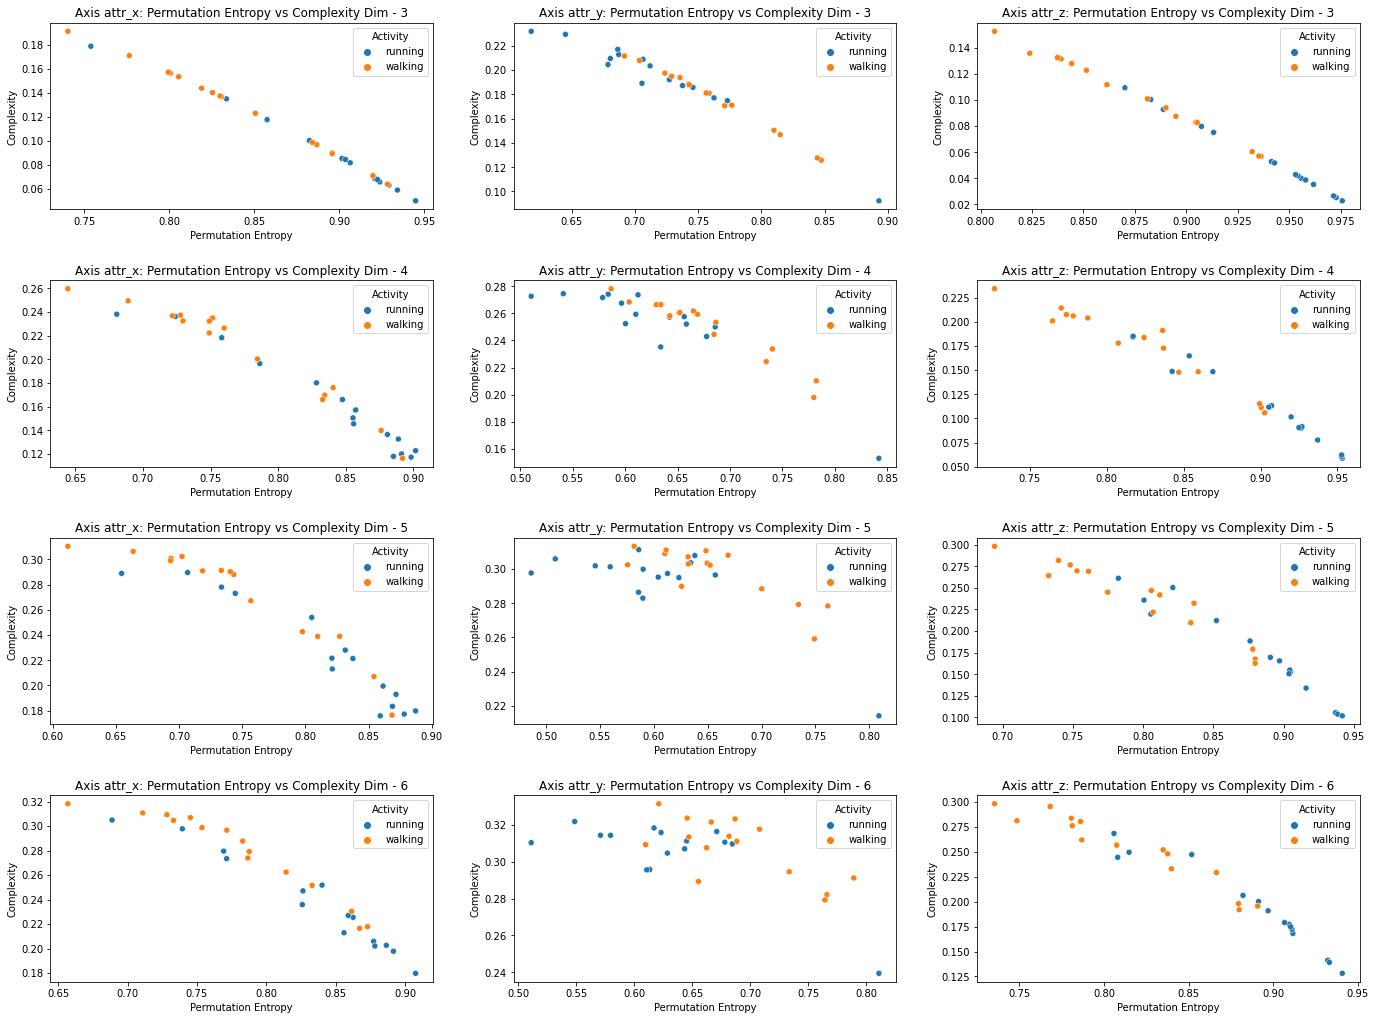

In [ ]:
# Generating scatter plots for permutation entropy vs. complexity according to running & walking for chest data
fig, ax = plt.subplots(4, 3 ,  figsize=(20,15))
fig.tight_layout(pad=5)

Dimension = [3,4,5,6]
for Dim in range(4):
    for axis in ['attr_x', 'attr_y', 'attr_z']:
        title= 'Axis ' + str(axis)+ ': ' + 'Permutation Entropy vs Complexity'+ ' Dim - ' + str(Dimension[Dim])
        task2_output= df_chest[(df_chest['Accelerometer Axis'] == axis) & ((df_chest['Activity']=='running') | (df_chest['Activity']=='walking')) & (df_chest['Signal Length'] == 4096) & (df_chest['Delay'] == 1) & (df_chest['Dimension'] == Dimension[Dim])]   
        if axis == 'attr_x':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue="Activity" , ax=ax[Dimension.index(Dimension[Dim]),0]).set_title(title)
        elif axis == 'attr_y':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),1]).set_title(title)
        elif axis == 'attr_z':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),2]).set_title(title)
        

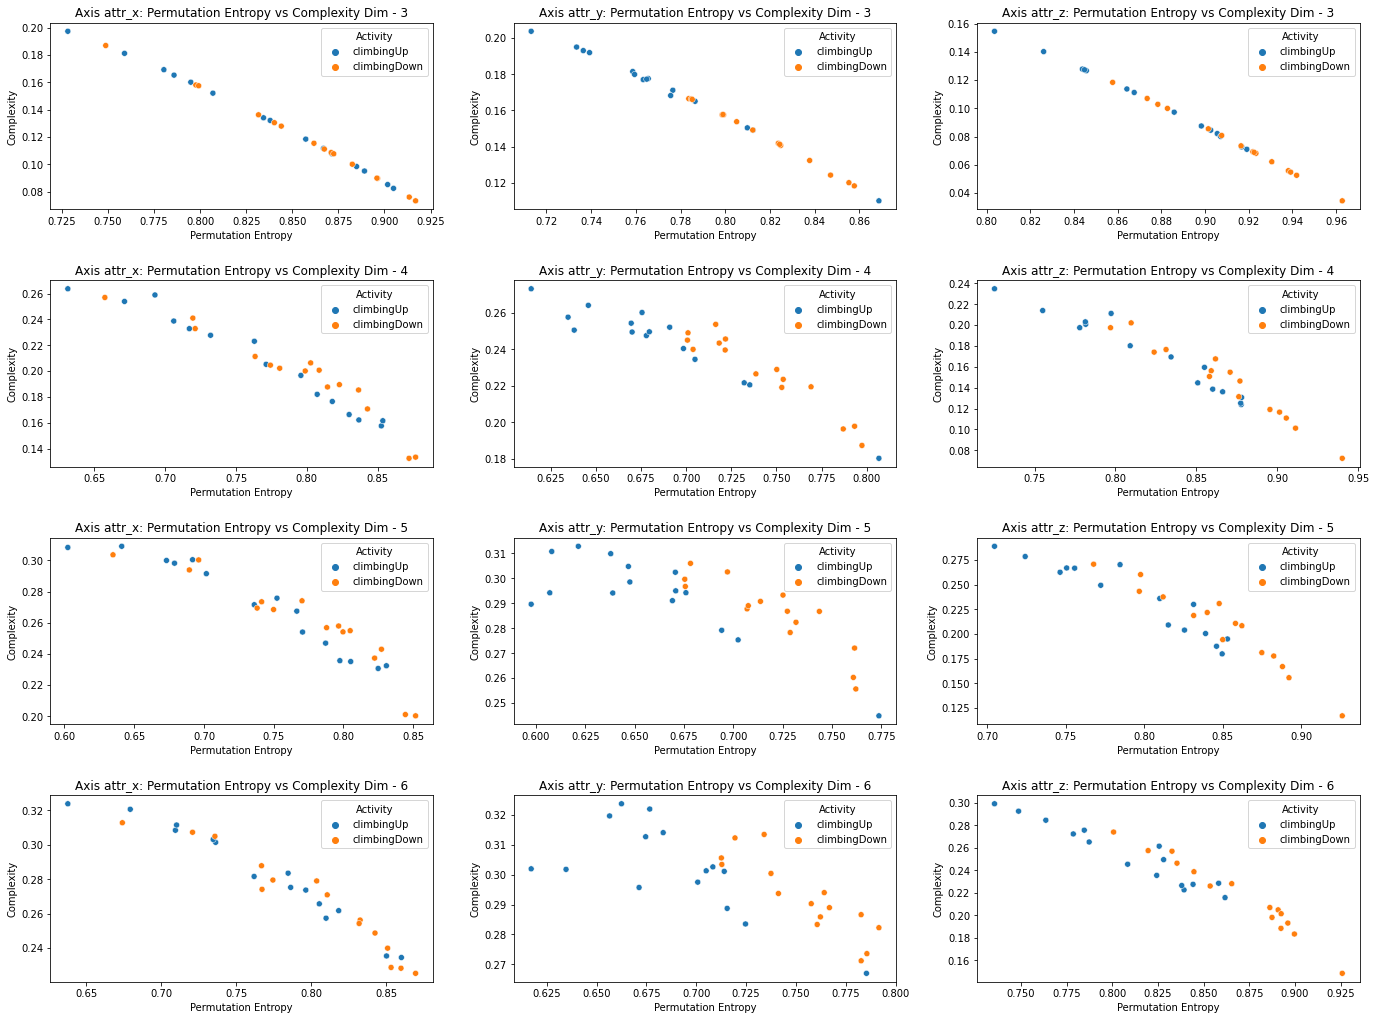

In [ ]:
# Generating scatter plots for permutation entropy vs. complexity according to climbing up & down for chest data
fig, ax = plt.subplots(4, 3 ,  figsize=(20, 15))
fig.tight_layout(pad=5)

Dimension = [3,4,5,6]
for Dim in range(4):
    for axis in ['attr_x', 'attr_y', 'attr_z']:
        title= 'Axis ' + str(axis)+ ': ' + 'Permutation Entropy vs Complexity'+ ' Dim - ' + str(Dimension[Dim])
        task2_output= df_chest[(df_chest['Accelerometer Axis'] == axis) & ((df_chest['Activity']=='climbingDown') | (df_chest['Activity']=='climbingUp')) & (df_chest['Signal Length'] == 4096) & (df_chest['Delay'] == 1) & (df_chest['Dimension'] == Dimension[Dim])]   
        if axis == 'attr_x':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue="Activity" , ax=ax[Dimension.index(Dimension[Dim]),0]).set_title(title)
        elif axis == 'attr_y':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),1]).set_title(title)
        elif axis == 'attr_z':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),2]).set_title(title)
    

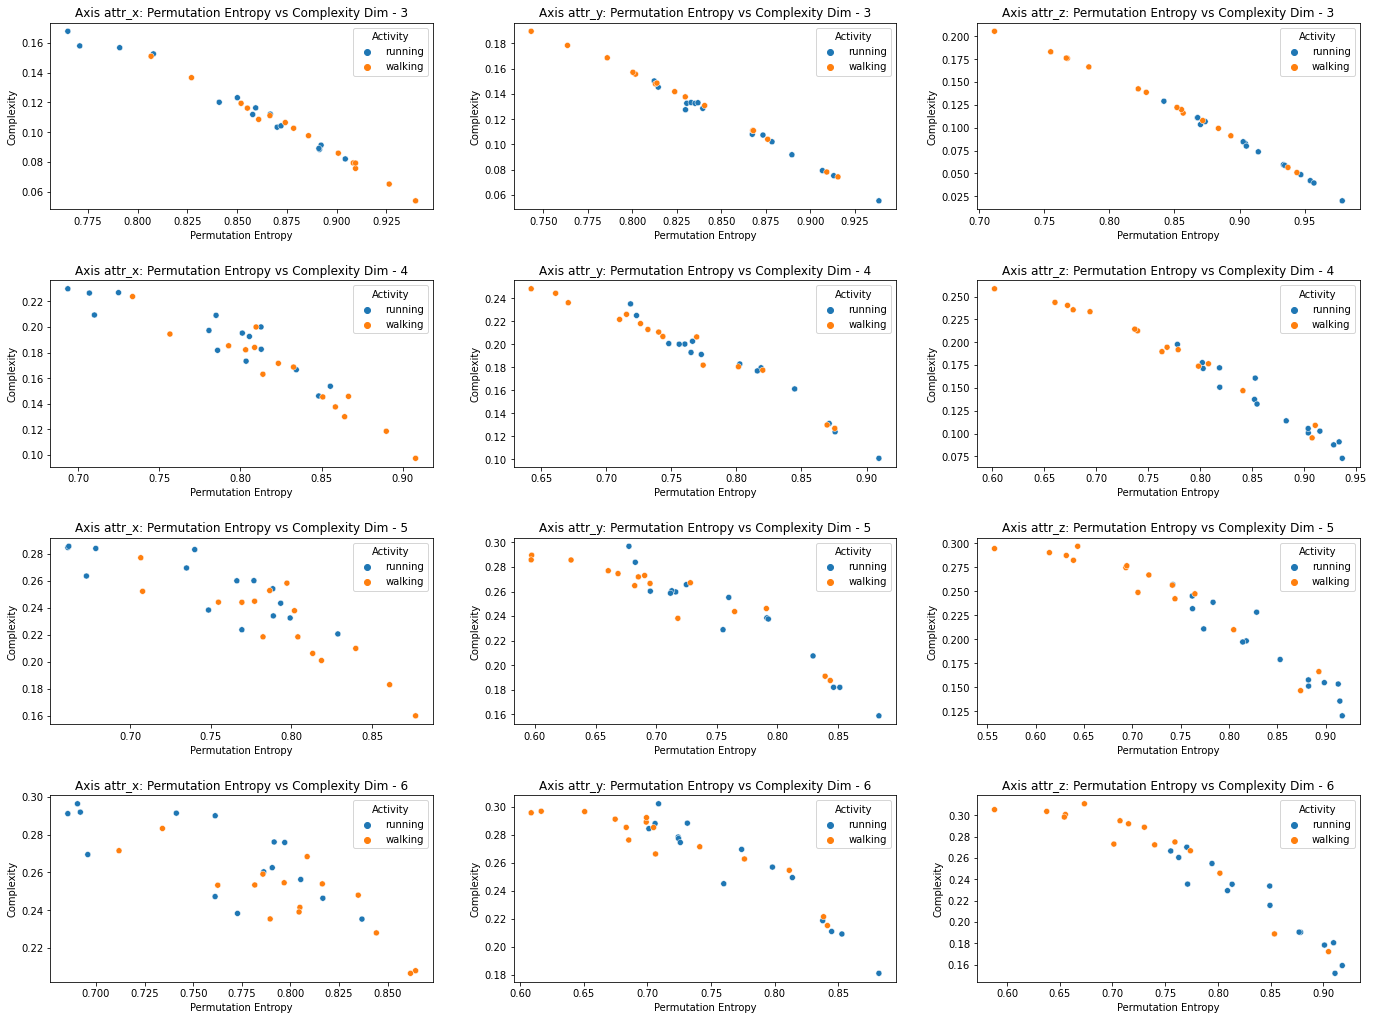

In [ ]:
# Generating scatter plots for permutation entropy vs. complexity according to running & walking for head data
fig, ax = plt.subplots(4, 3 , figsize=(20,15))
fig.tight_layout(pad=5)

Dimension = [3,4,5,6]
for Dim in range(4):
    for axis in ['attr_x', 'attr_y', 'attr_z']:
        title= 'Axis ' + str(axis)+ ': ' + 'Permutation Entropy vs Complexity'+ ' Dim - ' + str(Dimension[Dim])
        task2_output= df_head[(df_chest['Accelerometer Axis'] == axis) & ((df_head['Activity']=='running') | (df_head['Activity']=='walking')) & (df_head['Signal Length'] == 4096) & (df_head['Delay'] == 1) & (df_head['Dimension'] == Dimension[Dim])]   
        if axis == 'attr_x':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue="Activity" , ax=ax[Dimension.index(Dimension[Dim]),0]).set_title(title)
        elif axis == 'attr_y':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),1]).set_title(title)
        elif axis == 'attr_z':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),2]).set_title(title)
        

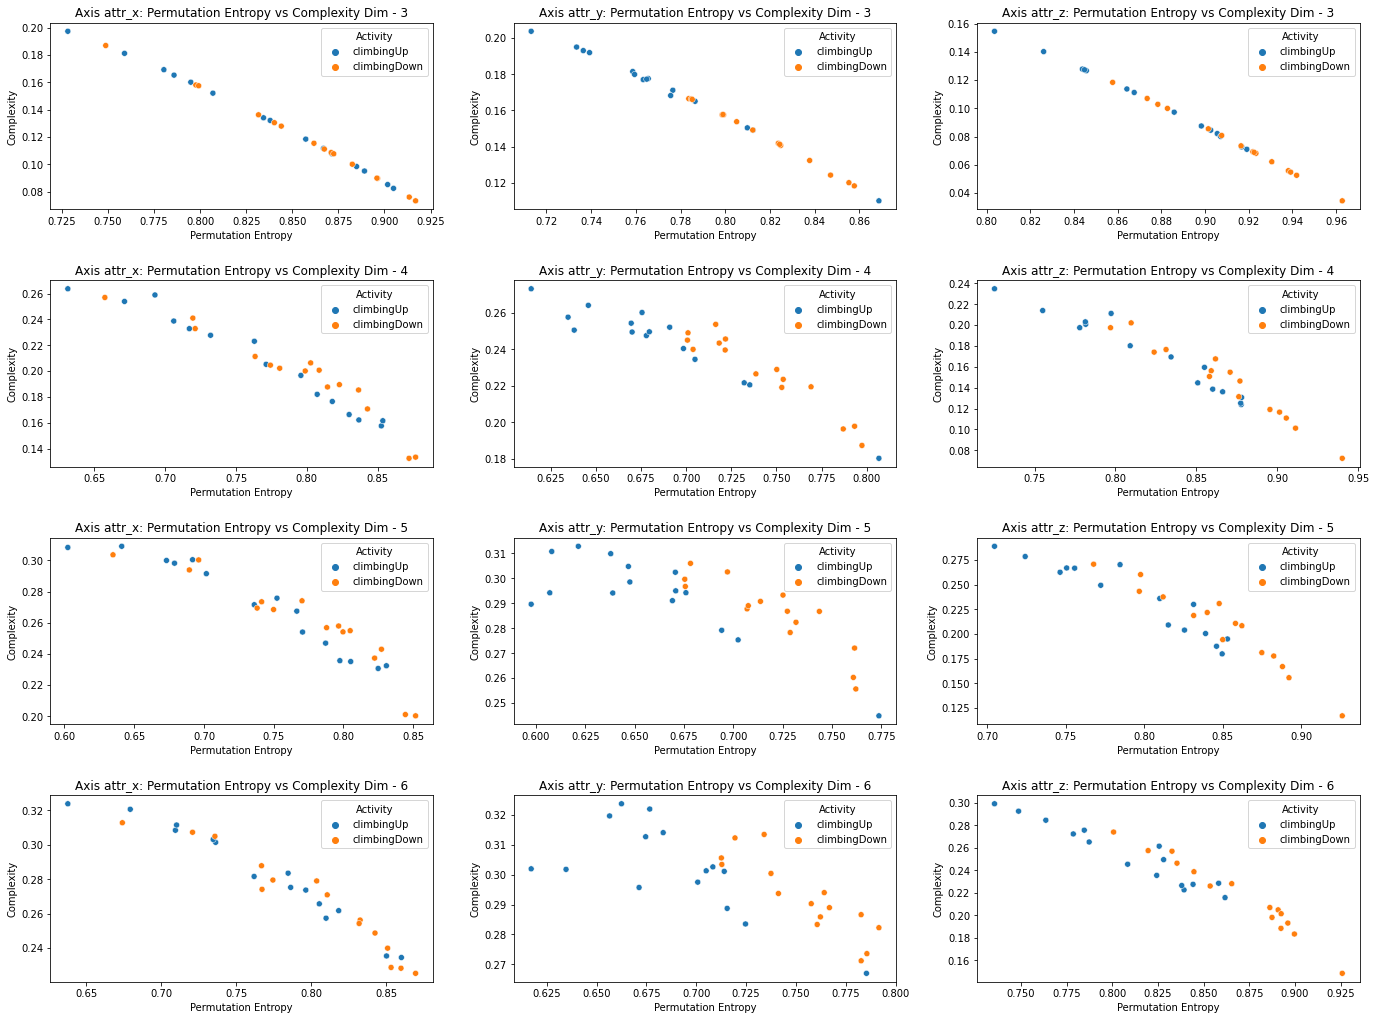

In [ ]:
# Generating scatter plots for permutation entropy vs. complexity according to climbing up & down for head data
fig, ax = plt.subplots(4, 3 ,  figsize=(20, 15))
fig.tight_layout(pad=5)

Dimension = [3,4,5,6]
for Dim in range(4):
    for axis in ['attr_x', 'attr_y', 'attr_z']:
        title= 'Axis ' + str(axis)+ ': ' + 'Permutation Entropy vs Complexity'+ ' Dim - ' + str(Dimension[Dim])
        task2_output= df_chest[(df_head['Accelerometer Axis'] == axis) & ((df_head['Activity']=='climbingDown') | (df_head['Activity']=='climbingUp')) & (df_head['Signal Length'] == 4096) & (df_head['Delay'] == 1) & (df_head['Dimension'] == Dimension[Dim])]   
        if axis == 'attr_x':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue="Activity" , ax=ax[Dimension.index(Dimension[Dim]),0]).set_title(title)
        elif axis == 'attr_y':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),1]).set_title(title)
        elif axis == 'attr_z':
            sns.scatterplot(data= task2_output, x='Permutation Entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),2]).set_title(title)
    

In [16]:
%%shell
jupyter nbconvert --to html /content/Project2_Task2.ipynb

[NbConvertApp] Converting notebook /content/Project2_Task2.ipynb to html
[NbConvertApp] Writing 1445802 bytes to /content/Project2_Task2.html
